In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import calendar
import time

def unit_transform(numbers):
    if type(numbers) == list:
        return list(map(lambda x: round(x / 1000, 2), numbers))
    else:
        return round(numbers / 1000, 2)
# unit_transform([10000, 2444, 5512])
# unit_transform(4244)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

In [20]:
### free paramters 
house_price = 165000
downpayment_ratio = 0.20
mortgage_yr = 30
interest_rate = 0.03875
target_yr = 30
rent_month = 1600

# cost
hoa_fee_month = 0
hoa_fee_yr = hoa_fee_month * 12
maintainance_yr = 2000
property_tax = 2000

rental_income_ratio_yr = round(rent_month * 12 / house_price, 2)
title = f"house price:{unit_transform(house_price)}k, downpayment ratio:{downpayment_ratio*100}%, interest_rate:{interest_rate*100}%, mortgage year:{mortgage_yr}"
title += f"\nmonthly rent:{rent_month}, hoa_fee_yr:{unit_transform(hoa_fee_yr)}k, maintainance_yr:{unit_transform(maintainance_yr)}k, property_tax:{unit_transform(property_tax)}k"
print(title)

house price:165.0k, downpayment ratio:20.0%, interest_rate:3.875%, mortgage year:30
monthly rent:1600, hoa_fee_yr:0.0k, maintainance_yr:2.0k, property_tax:2.0k


In [21]:
# scalar data
num_payment = mortgage_yr * 12
interest_rate_month = interest_rate / 12
# Discount Factor (D) = {[(1 + i) ^n] - 1} / [i(1 + i)^n]
discount_factor = ((1 + interest_rate_month)** num_payment - 1) / (interest_rate_month * (1 + interest_rate_month)** num_payment)
downpayment = house_price * downpayment_ratio
loan = house_price - downpayment

# loan need to pay per month
loan_payment = round(loan / discount_factor, 0)
interest_total = loan_payment * num_payment - loan

info = f"Downpayment:{unit_transform(downpayment)}k\nTotal loan:{unit_transform(loan)}k\nTotal interest:{unit_transform(interest_total)}k\nMonthly loan payment:{loan_payment}\n"
info += f"Intereate rate:{interest_rate*100}%\n"
info += f"Monthly rent: {rent_month}\nRent ratio per year:{rental_income_ratio_yr*100}%"
# print(info)

# data for each month
loan_cur = loan
loan_balance = []
principal_paid = []
interest_paid = []
expenses = []
net_incomes = []
yield_ratio = []

# data for each year
loan_balance_yrs = []
principal_paid_yrs= []
interest_paid_yrs = []
expenses_yrs = []
net_incomes_yrs = []
yield_ratio_yrs = []
# accumulate n years back. 
net_income_acc_yrs = []
net_income_no_mortgage_acc_yrs = []
yield_ratio_acc_yrs = []
yield_ratio_no_mortgage_acc_yrs = []

for idx in range(1, target_yr * 12 + 1):
    if idx <= num_payment:
        interest_part = loan_cur * interest_rate_month 
        interest_paid.append(int(interest_part))
        principal_part = loan_payment - interest_part
        principal_paid.append(int(principal_part))
        loan_cur -= principal_part
        loan_balance.append(int(loan_cur))
        expenses.append(int(principal_paid[-1] + (expenses[-1] if expenses else downpayment )))
        net_incomes.append(int(rent_month - interest_part - hoa_fee_month))
    else:
        assert loan_cur < 1
        loan_balance.append(0)
        principal_paid.append(0)
        interest_paid.append(0)
        expenses.append(int(expenses[-1]))
        net_incomes.append(rent_month - hoa_fee_month)
        
    yield_ratio.append(net_incomes[-1]/ expenses[-1])

    # gather for year data
    if idx % 12 == 0:
        loan_balance_yrs.append(unit_transform(loan_balance[idx-1]))
        principal_paid_yrs.append(unit_transform(sum(principal_paid[idx-12: idx])))
        interest_paid_yrs.append(unit_transform(sum(interest_paid[idx-12: idx])))
        expenses_yrs.append(unit_transform(expenses[idx-1]))
        # already deduct hoa from monthly net_income
        net_incomes_cur_yr = unit_transform(sum(net_incomes[idx-12: idx]) - property_tax - maintainance_yr)
        net_incomes_yrs.append(net_incomes_cur_yr)
        yield_ratio_yrs.append(round(net_incomes_yrs[-1]/expenses_yrs[-1]*100, 2 ))
        net_income_acc_yrs.append(sum(net_incomes_yrs))
        cost_acc_yr = (property_tax + maintainance_yr + hoa_fee_yr) * (idx // 12)
        net_income_no_mortgage_acc_yrs.append(unit_transform(rent_month * idx - cost_acc_yr))
        yield_ratio_acc_yrs.append(round(net_income_acc_yrs[-1]/expenses_yrs[-1]*100, 2 ))
        yield_ratio_no_mortgage_acc_yrs.append(round(net_income_no_mortgage_acc_yrs[-1] * 1000 / house_price *100, 2))
        
debug = False
if debug:
    print("loan_balance:", loan_balance)
    print("principal_paid:", principal_paid)
    print("interest_paid:", interest_paid)
    print("expenses:", expenses)
    print("net_incomes:", net_incomes)
    print("yield_ratio:", yield_ratio)

debug = False
if debug:
    print("loan_balance_yrs:", loan_balance_yrs)
    print("principal_paid_yrs:", principal_paid_yrs)
    print("interest_paid_yrs:", interest_paid_yrs)
    print("expenses_yrs:", expenses_yrs)
    print("net_incomes_yrs:", net_incomes_yrs)
    print("yield_ratio_yrs:", yield_ratio_yrs)
    print("net_income_acc_yrs:", net_income_acc_yrs)
    print("net_income_no_mortgage_acc_yrs", net_income_no_mortgage_acc_yrs)
    print("yield_ratio_acc_yrs:", yield_ratio_acc_yrs)
    print("yield_ratio_no_mortgage_acc_yrs:", yield_ratio_no_mortgage_acc_yrs)

house price:165.0k, downpayment ratio:20.0%, interest_rate:3.875%, mortgage year:30
monthly rent:1600, hoa_fee_yr:0.0k, maintainance_yr:2.0k, property_tax:2.0k
Downpayment:33.0k
Total loan:132.0k
Total interest:91.56k
Monthly loan payment:621.0
Intereate rate:3.875%
Monthly rent: 1600
Rent ratio per year:12.0%
Done!


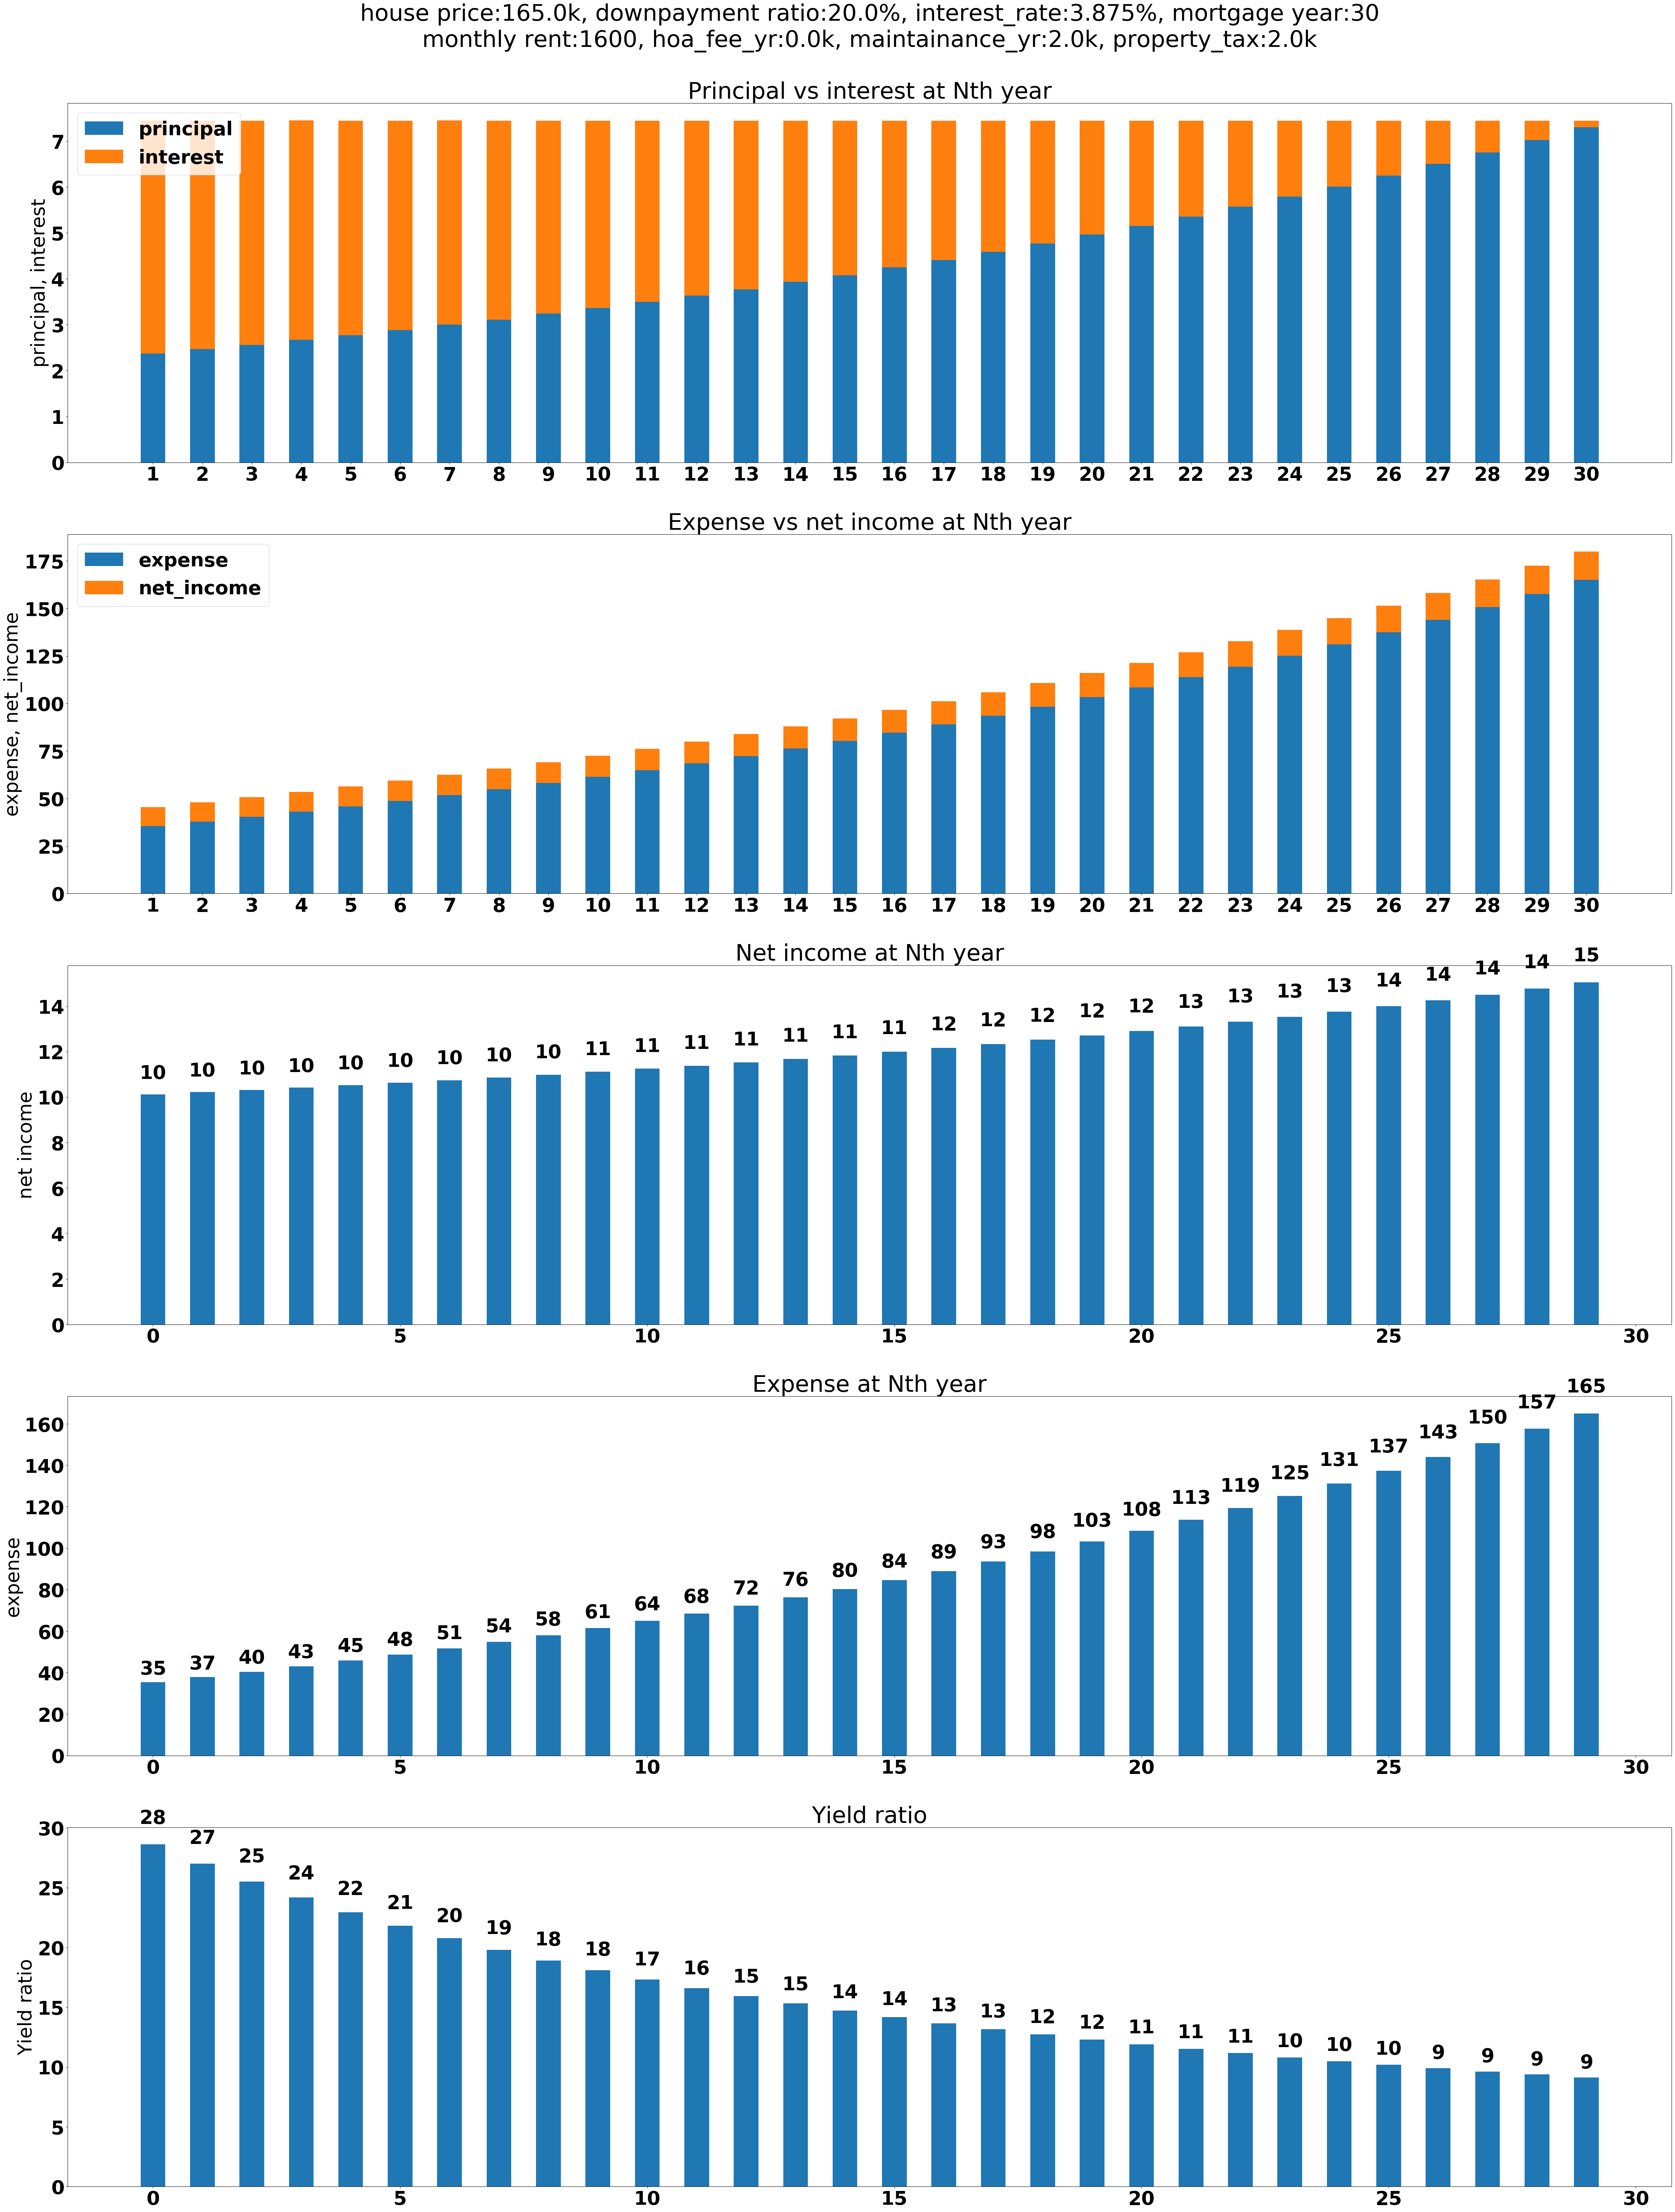

In [22]:
# plotting
print(title)
print(info)

font = {'weight' : 'bold',
        'size'   : 40}
figure(num=None, figsize=(60, 80), dpi=100, facecolor='w', edgecolor='k')

plt.rc('font', **font)
width = 0.5
target_yrs = np.arange(target_yr)
plt.subplot(5,1,1)
p_principal = plt.bar(target_yrs, principal_paid_yrs, width)
p_interest = plt.bar(target_yrs, interest_paid_yrs, width, bottom=principal_paid_yrs)
plt.ylabel('principal, interest')
plt.xticks(target_yrs, target_yrs + 1)
plt.legend((p_principal[0], p_interest[0]), ('principal', 'interest'))
plt.title("{}\n\nPrincipal vs interest at Nth year".format(title))

plt.subplot(5,1,2)
p_expense = plt.bar(target_yrs, expenses_yrs, width)
p_net_income = plt.bar(target_yrs, net_incomes_yrs, width, bottom=expenses_yrs)
plt.ylabel('expense, net_income')
plt.xticks(target_yrs, target_yrs + 1)
plt.legend((p_expense[0], p_net_income[0]), ('expense', 'net_income'))
plt.title("Expense vs net income at Nth year")

plt.subplot(5,1,3)
p_net_income = plt.bar(target_yrs, net_incomes_yrs, width)
plt.ylabel('net income')
plt.title("Net income at Nth year")
autolabel(p_net_income)

plt.subplot(5,1,4)
p_expense = plt.bar(target_yrs, expenses_yrs, width)
plt.ylabel('expense')
plt.title("Expense at Nth year")
autolabel(p_expense)

plt.subplot(5,1,5)
p_earning_ratio = plt.bar(target_yrs, yield_ratio_yrs, width)
plt.ylabel('Yield ratio')
plt.title("Yield ratio")
autolabel(p_earning_ratio)

# plt.show()

ts = calendar.timegm(time.gmtime())
plt.savefig("Invest_charts_{}.png".format(ts))

print("Done!")

Done!


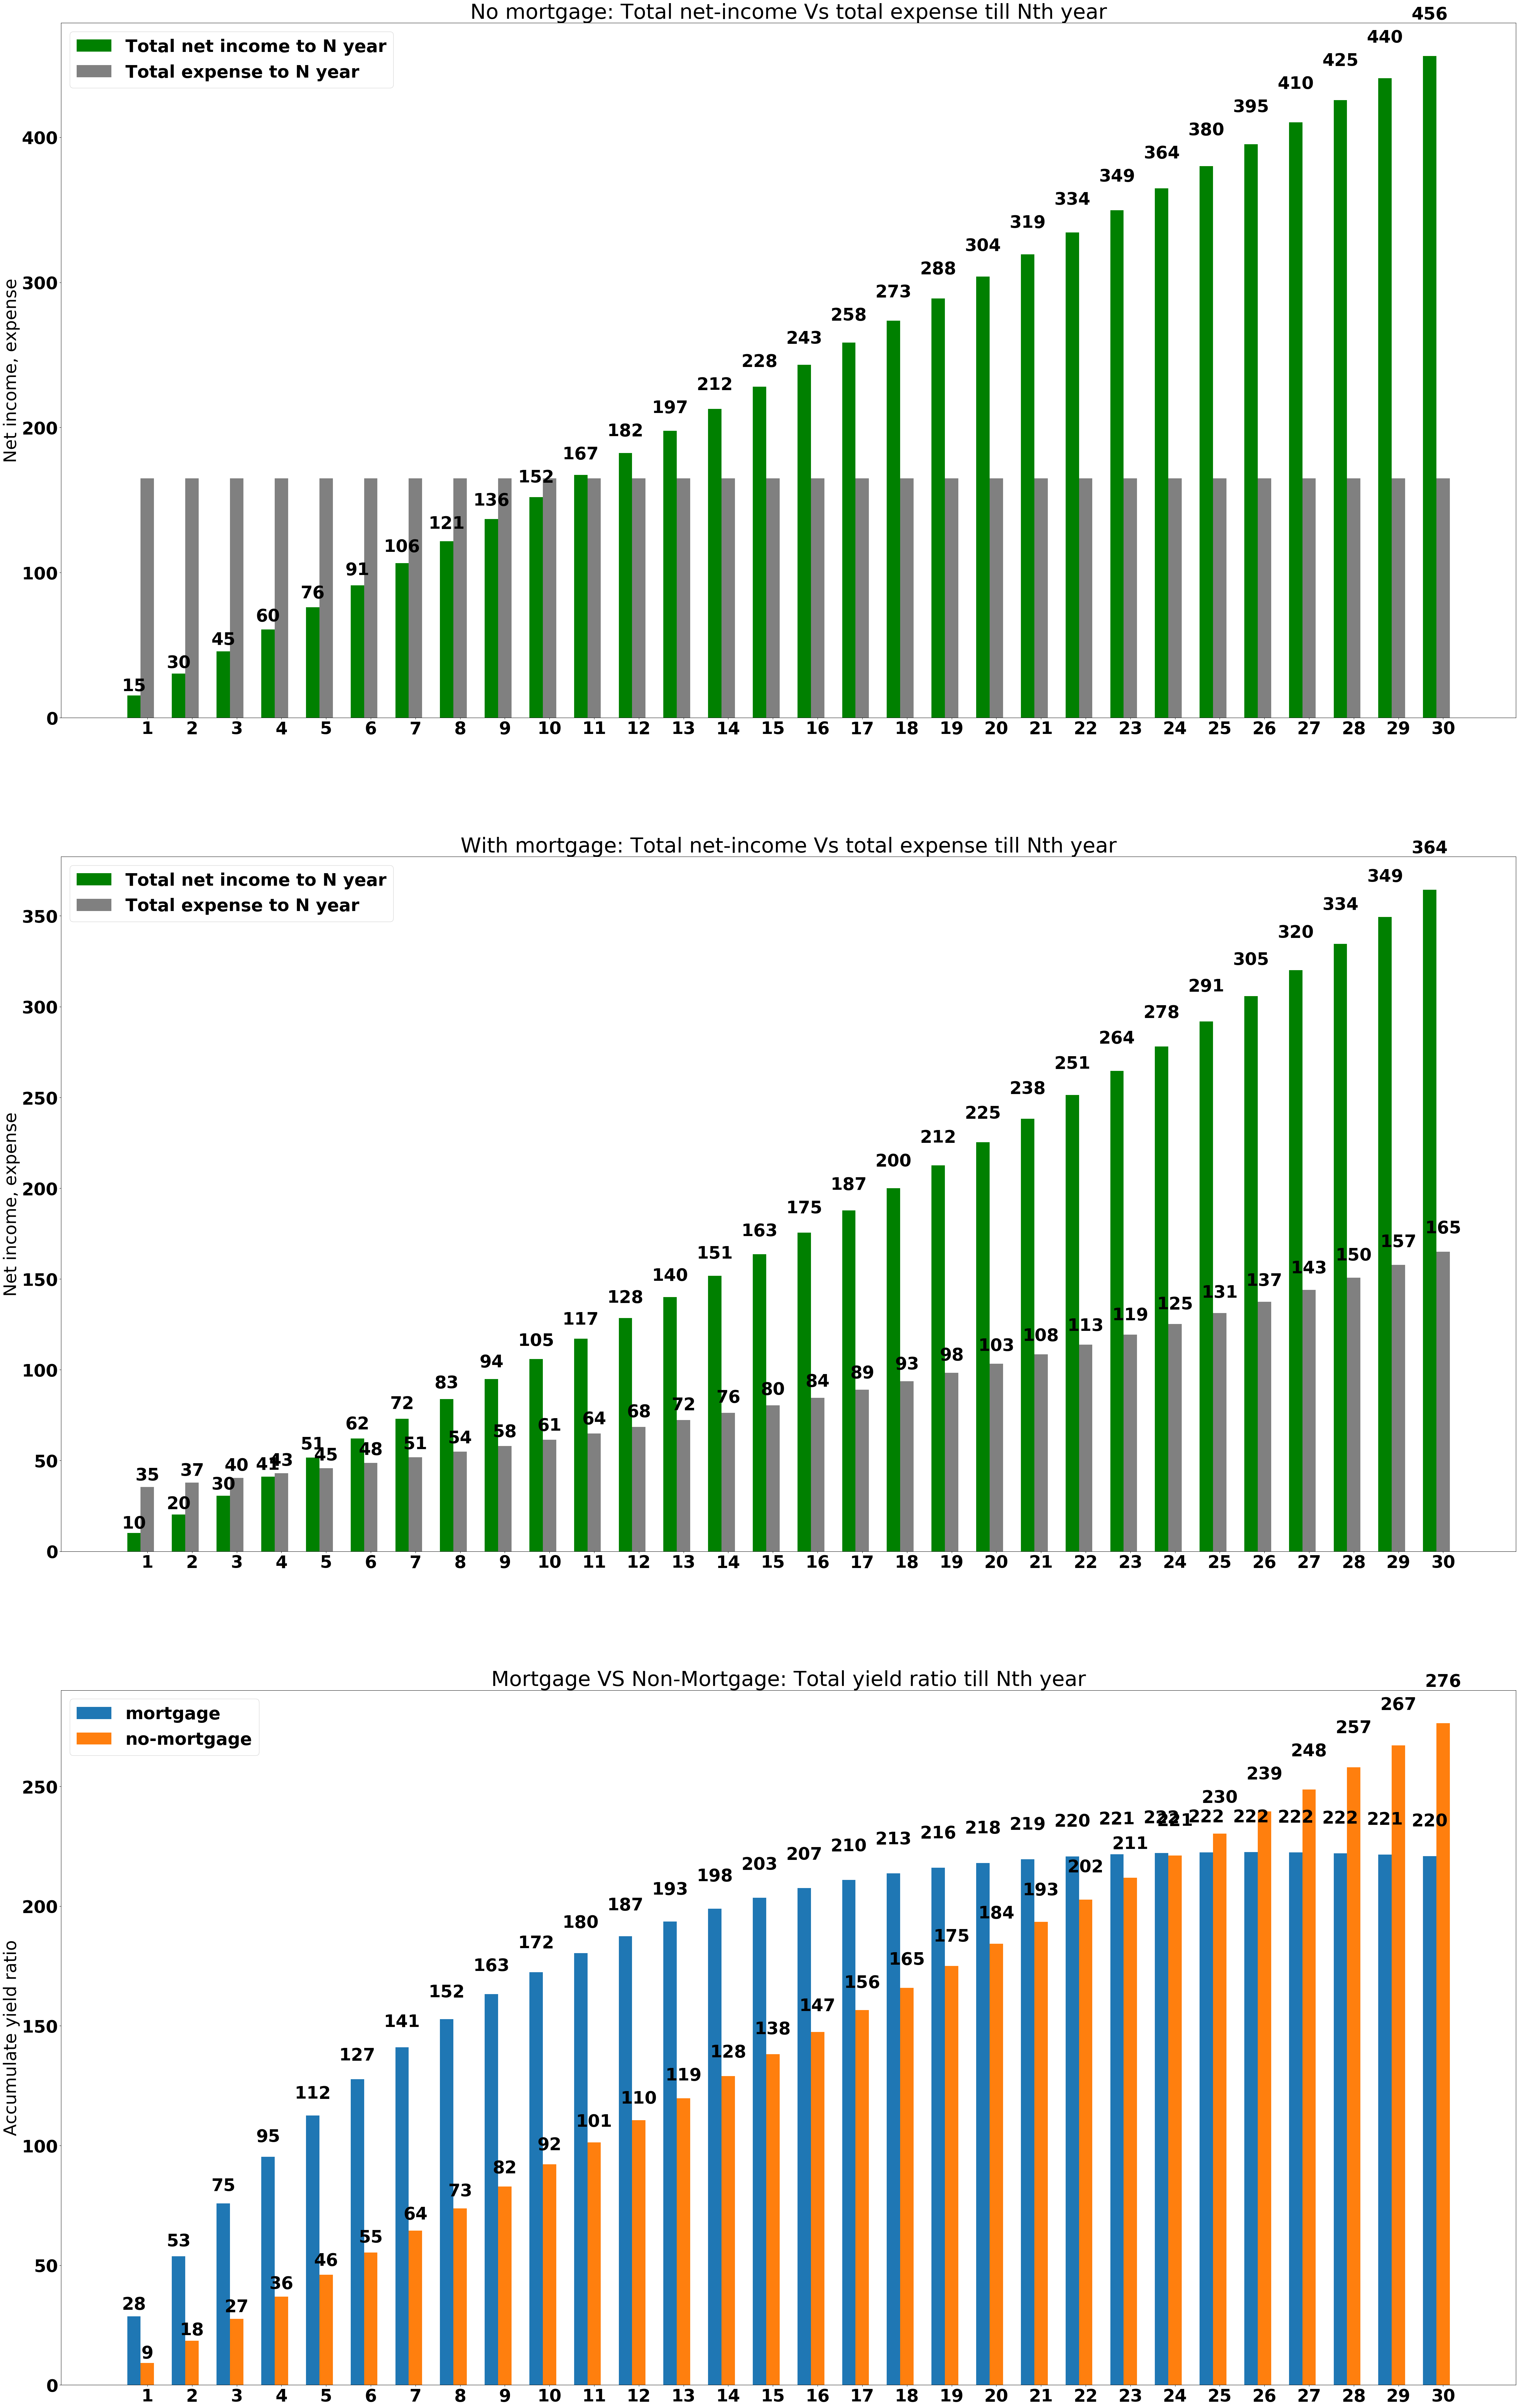

In [23]:
font = {'weight' : 'bold',
        'size'   : 40}
figure(num=None, figsize=(60, 100), dpi=100, facecolor='w', edgecolor='k')

width = 0.3
plt.rc('font', **font)
plt.subplot(3,1,1)
p_net_income_no_mortgage_acc = plt.bar(target_yrs-width, net_income_no_mortgage_acc_yrs, width, color='green')
p_expenses = plt.bar(target_yrs, [unit_transform(house_price)]*target_yr, width, color='gray')
plt.ylabel('Net income, expense')
plt.xticks(target_yrs, target_yrs + 1)
plt.legend((p_net_income_no_mortgage_acc[0], p_expenses[0]), ('Total net income to N year', 'Total expense to N year'))
plt.title("No mortgage: Total net-income Vs total expense till Nth year")
autolabel(p_net_income_no_mortgage_acc)

plt.subplot(3,1,2)
p_net_income_acc = plt.bar(target_yrs-width, net_income_acc_yrs, width, color='green')
p_expenses = plt.bar(target_yrs, expenses_yrs, width, color='gray')
plt.ylabel('Net income, expense')
plt.xticks(target_yrs, target_yrs + 1)
plt.legend((p_net_income_acc[0], p_expenses[0]), ('Total net income to N year', 'Total expense to N year'))
plt.title("With mortgage: Total net-income Vs total expense till Nth year")
autolabel(p_net_income_acc)
autolabel(p_expenses)

plt.subplot(3,1,3)
p_yield_ratio_acc = plt.bar(target_yrs-width, yield_ratio_acc_yrs, width)
p_yield_ratio_no_mortgage_acc = plt.bar(target_yrs, yield_ratio_no_mortgage_acc_yrs, width)
plt.ylabel('Accumulate yield ratio')
plt.xticks(target_yrs, target_yrs + 1)
plt.legend((p_yield_ratio_acc[0], p_yield_ratio_no_mortgage_acc[0]), ('mortgage', 'no-mortgage'))
plt.title("Mortgage VS Non-Mortgage: Total yield ratio till Nth year")
autolabel(p_yield_ratio_acc)
autolabel(p_yield_ratio_no_mortgage_acc)
#
plt.savefig("Accumulate_yield_{}.png".format(ts))
print("Done!")


In [ ]:
# 如果没有更好的投资策略把杠杠节省下的本金进行投资，那么第一年的高yield下的net income会在n年后稀释，用来除的分母会逐渐变大。如果只有房子
# 作为投资, 应该考虑上图累积图的break even点参考。